# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [58]:
df = pd.read_csv("data/comprar_alquilar.csv")

In [59]:
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [61]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

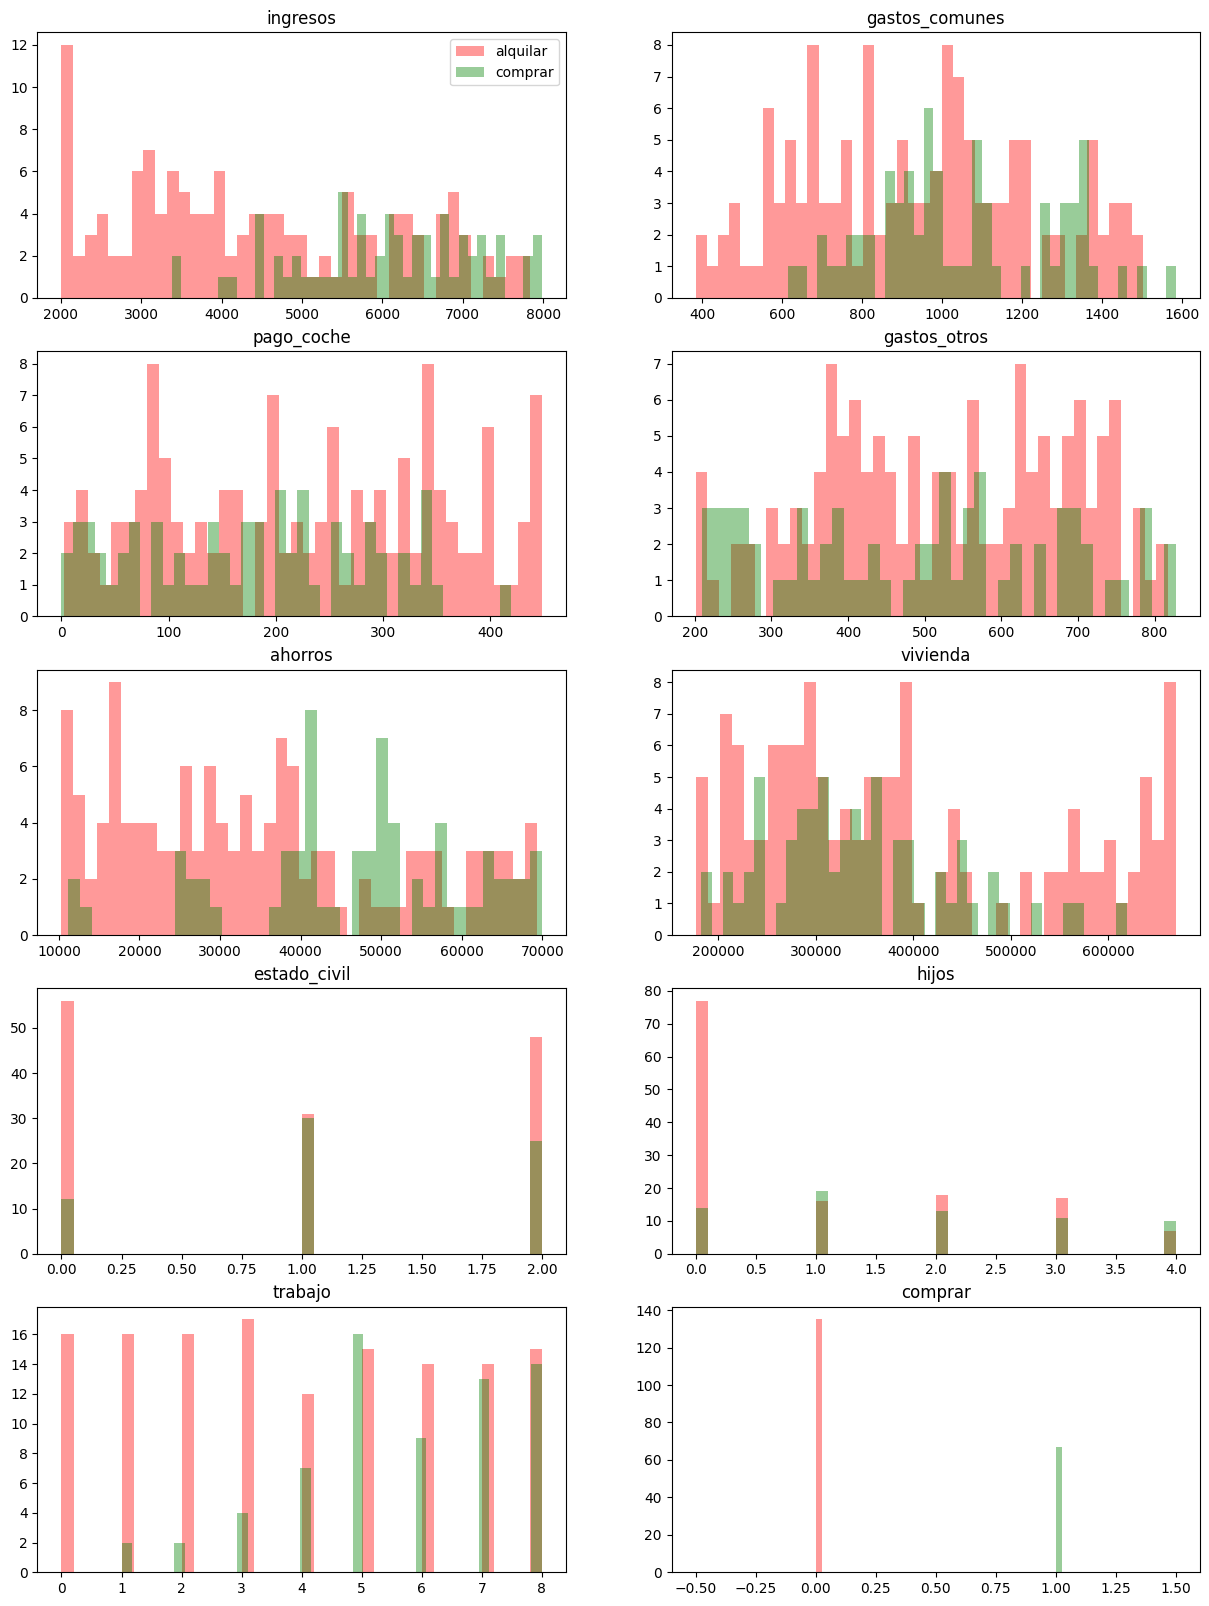

In [62]:
fig, axes = plt.subplots(5,2, figsize=(15,20))
alquilar = df[df['comprar']==0]
comprar = df[df['comprar']==1]
axes = axes.ravel()
for i in range(len(df.columns)):
    axes[i].hist(alquilar.values[:,i], bins = 40, color='r',alpha=0.4)
    axes[i].hist(comprar.values[:,i],bins = 40, color='g',alpha=0.4)
    axes[i].set_title(df.columns[i])

axes[0].legend(['alquilar','comprar']);

# de nada guapis :)

In [63]:
# crea un pairplot con hue='comprar'

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [64]:
# Divide solo en X e y, de momento no es necesario dividir en train y test

In [65]:
X = df.iloc[:,:-1]
X.shape

(202, 9)

In [66]:
y = df.iloc[:,-1]

In [67]:
# Instancia un Standard Scaler

# Entrena, transforma y guarda el resultado en una nueva variable

In [68]:
scaler = StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)
scaled_df.shape

(202, 9)

In [69]:
# Comprueba el shape del nuevo conjunto escalado

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [70]:
# Instancia un PCA

# Entrena, transforma y guarda el resultado en una nueva variable

In [71]:
pca_model = PCA()
pca_model.fit(scaled_df)
pca_df = pca_model.transform(scaled_df)
pca_df.shape

(202, 9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [72]:
# ratio de varianza explicada para cada componente
pca_model.explained_variance_ratio_.cumsum()[:5]

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621])

In [73]:
# quédate solo con la suma acumulada de las 5 primeras componentes

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

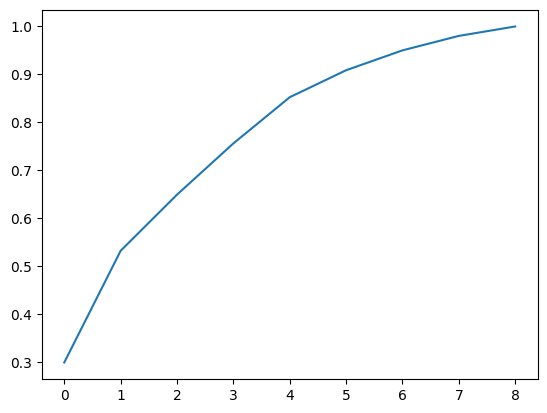

In [74]:
plt.plot(pca_model.explained_variance_ratio_.cumsum())

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

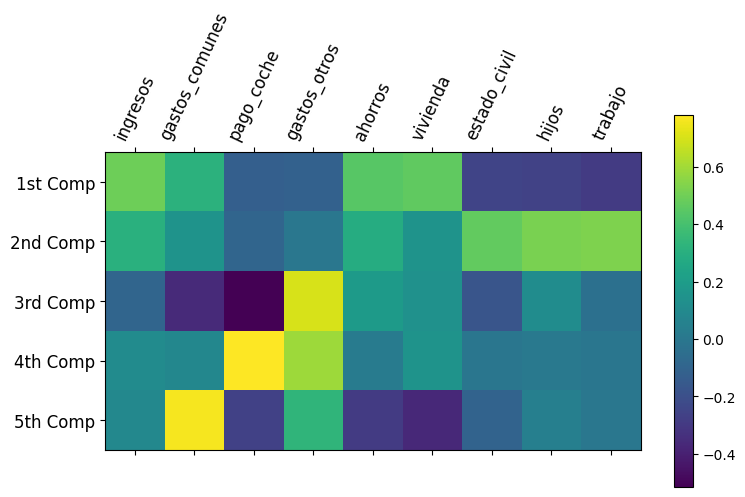

In [75]:
plt.matshow(pca_model.components_[0:5], cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# Divide en train y test con test_size=0.2 y random_state=42

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# crea un Pipeline con un StandardScaler(), un PCA(n_components=5)) y un KNeighborsClassifier(n_neighbors=3)

In [80]:
pipe = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=5)),
    ("knn", KNeighborsClassifier())
])
knn_param = {
    "knn__n_neighbors" : [3],
}

gs_pipe = GridSearchCV(estimator= pipe,
                        param_grid = knn_param,
                        scoring="balanced_accuracy",
                        n_jobs=-1,
                        cv=5)

gs_pipe.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA(n_components=5)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3]},
             scoring='balanced_accuracy')

In [81]:
# entrena el Pipeline

In [82]:
y_pred = gs_pipe.best_estimator_.predict(X_test)
train_predictions = gs_pipe.best_estimator_.predict(X_train)

In [83]:
# predice con el Pipeline

In [84]:
# Imprime el score del Pipeline con train y test

In [85]:
# from sklearn.metrics import f1_score, precision_score, auc, recall_score

In [86]:
print("accuracy train:",accuracy_score(y_train, train_predictions))
print("accuracy test:",accuracy_score(y_test, y_pred))

accuracy train: 0.9130434782608695
accuracy test: 0.7560975609756098


In [87]:
# Obtén la matriz de confusión

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  3],
       [ 7, 10]])

### Ahora probamos otro camino, crea un Pipeline con make_pipeline para usarlo en un GridSearchCV

Usa el conjunto de datos de train para hacer el cross validation

In [89]:
from sklearn.pipeline import make_pipeline

In [90]:
# crea el Pipeline sin introducir hiperparámetros

In [91]:
pca_pipe = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=5)),
    ("knn", KNeighborsClassifier())
])
knn_param = {
    "PCA__n_components" : [1,2,3,4,5,6,7,8,9],
    "knn__n_neighbors" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

gs_pipe = GridSearchCV(estimator= pca_pipe,
                        param_grid = knn_param,
                        scoring="accuracy",
                        n_jobs=-1,
                        cv=10)

gs_pipe.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA(n_components=5)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'PCA__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [37]:
# crea un diccionario params con los parámetros que quieres explorar en el GridSearchCV

# buscaremos en un rango de 1 a 10 para n_components del PCA

# y también buscaremos en un rango de 1 a 20 para n_neighbors del knn


In [38]:
# Crea el GridSearchCV con el Pipeline, los params, cv=10 y scoring='accuracy'

# Entrena el GridSearchCV con x_train e y_train


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [39]:
# Muestra el mejor resultado del GridSearchCV

In [40]:
print(gs_pipe.best_score_)
print(gs_pipe.best_params_)
print(gs_pipe.best_estimator_)

0.8886029411764707
{'PCA__n_components': 8, 'knn__n_neighbors': 7}
Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=8)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])


In [41]:
prediction = gs_pipe.predict(X_test)
train_prediction = gs_pipe.predict(X_train)

print("Accuracy test", accuracy_score(y_test, prediction))
print("Accuracy train", accuracy_score(y_train, train_prediction))

Accuracy test 0.8048780487804879
Accuracy train 0.906832298136646


Importamos pickle para guardar el mejor estimador y poder usarlo más adelante

In [42]:
import pickle

In [43]:
# Graba el mejor estimador en un archivo llamado 'my_model'

In [45]:
nombre_archivo = 'mi_modelo.pkl'

with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(gs_pipe, archivo)

In [133]:
# Carga tu modelo 'my_model' en una nueva variable

In [47]:
with open(nombre_archivo, 'rb') as archivo:
        modelo = pickle.load(archivo)

In [50]:
pre = modelo.predict(X_test)
print(accuracy_score(y_test, pre))

0.8048780487804879


In [141]:
# predice con tu modelo cargado

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [143]:
# guarda tus predicciones en un dataframe con sus respectivos índices

In [54]:
df_y_test = pd.DataFrame(pre)

In [55]:
# guarda el dataframe en un csv llamado "y_test.csv"

In [56]:
df_y_test.to_csv("y_test.csv")